In [79]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

### Data Loading 

In [80]:
from sklearn.datasets import load_wine
wine=load_wine()

In [81]:
import pandas as pd
df=pd.DataFrame(wine.data,wine.target,columns=wine.feature_names)
df['Quality']=wine.target
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
0     13.20        1.78  2.14               11.2      100.0           2.65   
0     13.16        2.36  2.67               18.6      101.0           2.80   
0     14.37        1.95  2.50               16.8      113.0           3.85   
0     13.24        2.59  2.87               21.0      118.0           2.80   
..      ...         ...   ...                ...        ...            ...   
2     13.71        5.65  2.45               20.5       95.0           1.68   
2     13.40        3.91  2.48               23.0      102.0           1.80   
2     13.27        4.28  2.26               20.0      120.0           1.59   
2     13.17        2.59  2.37               20.0      120.0           1.65   
2     14.13        4.10  2.74               24.5       96.0           2.05   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
0         2.76                  0.26             1.28             4.38  1.05   
0         3.24                  0.30             2.81             5.68  1.03   
0         3.49                  0.24             2.18             7.80  0.86   
0         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
2         0.61                  0.52             1.06             7.70  0.64   
2         0.75                  0.43             1.41             7.30  0.70   
2         0.69                  0.43             1.35            10.20  0.59   
2         0.68                  0.53             1.46             9.30  0.60   
2         0.76                  0.56             1.35             9.20  0.61   

    od280/od315_of_diluted_wines  proline  Quality  
0                           3.92   1065.0        0  
0                           3.40   1050.0        0  
0                           3.17   1185.0        0  
0                           3.45   1480.0        0  
0                           2.93    735.0        0  
..                           ...      ...      ...  
2                           1.74    740.0        2  
2                           1.56    750.0        2  
2                           1.56    835.0        2  
2                           1.62    840.0        2  
2                           1.60    560.0        2  

[178 rows x 14 columns]

In [82]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
0     13.20        1.78  2.14               11.2      100.0           2.65   
0     13.16        2.36  2.67               18.6      101.0           2.80   
0     14.37        1.95  2.50               16.8      113.0           3.85   
0     13.24        2.59  2.87               21.0      118.0           2.80   
..      ...         ...   ...                ...        ...            ...   
2     13.71        5.65  2.45               20.5       95.0           1.68   
2     13.40        3.91  2.48               23.0      102.0           1.80   
2     13.27        4.28  2.26               20.0      120.0           1.59   
2     13.17        2.59  2.37               20.0      120.0           1.65   
2     14.13        4.10  2.74               24.5       96.0           2.05   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
0         2.76                  0.26             1.28             4.38  1.05   
0         3.24                  0.30             2.81             5.68  1.03   
0         3.49                  0.24             2.18             7.80  0.86   
0         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
2         0.61                  0.52             1.06             7.70  0.64   
2         0.75                  0.43             1.41             7.30  0.70   
2         0.69                  0.43             1.35            10.20  0.59   
2         0.68                  0.53             1.46             9.30  0.60   
2         0.76                  0.56             1.35             9.20  0.61   

    od280/od315_of_diluted_wines  proline  Quality  
0                           3.92   1065.0        0  
0                           3.40   1050.0        0  
0                           3.17   1185.0        0  
0                           3.45   1480.0        0  
0                           2.93    735.0        0  
..                           ...      ...      ...  
2                           1.74    740.0        2  
2                           1.56    750.0        2  
2                           1.56    835.0        2  
2                           1.62    840.0        2  
2                           1.60    560.0        2  

[178 rows x 14 columns]

### Data Inception

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 2
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Quality     

In [84]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
Quality                           int32
dtype: object

In [85]:
df.shape

(178, 14)

In [86]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Quality                         0
dtype: int64

In [87]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

          Quality  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [88]:
#Here we can see that the classes inside the  target column is slightly imbalanced
df['Quality'].value_counts()

Quality
1    71
0    59
2    48
Name: count, dtype: int64

In [89]:
df['Quality'].value_counts(normalize=True)

Quality
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

In [90]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Quality'],
      dtype='object')

In [91]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with the target column 'Quality'
correlation_with_target = correlation_matrix['Quality'].sort_values(ascending=False)

print("Correlation of each feature with the target column 'Quality':")
print(correlation_with_target)

Correlation of each feature with the target column 'Quality':
Quality                         1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: Quality, dtype: float64


### Visualization

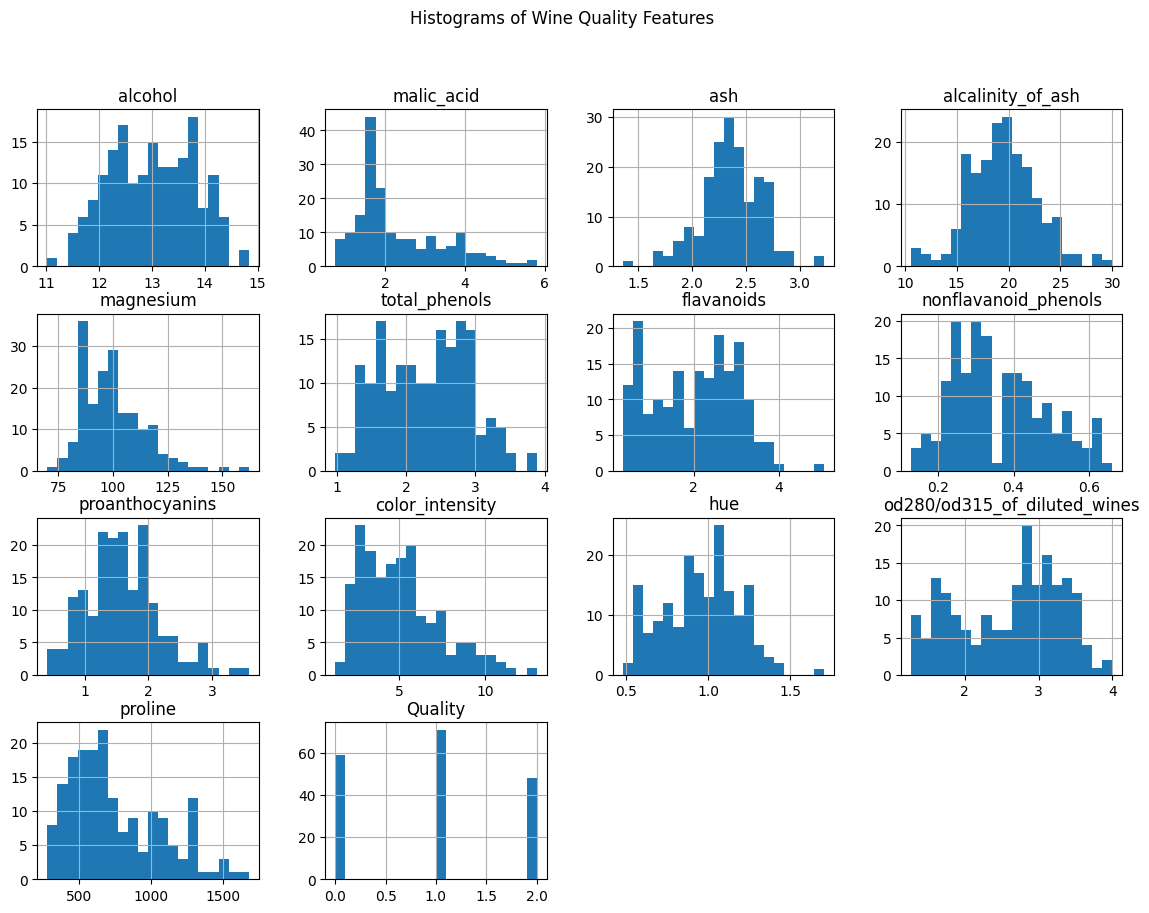

In [92]:
#Histogram
import matplotlib.pyplot as plt

# Plot histograms for each feature
df.hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.suptitle('Histograms of Wine Quality Features')
plt.show()

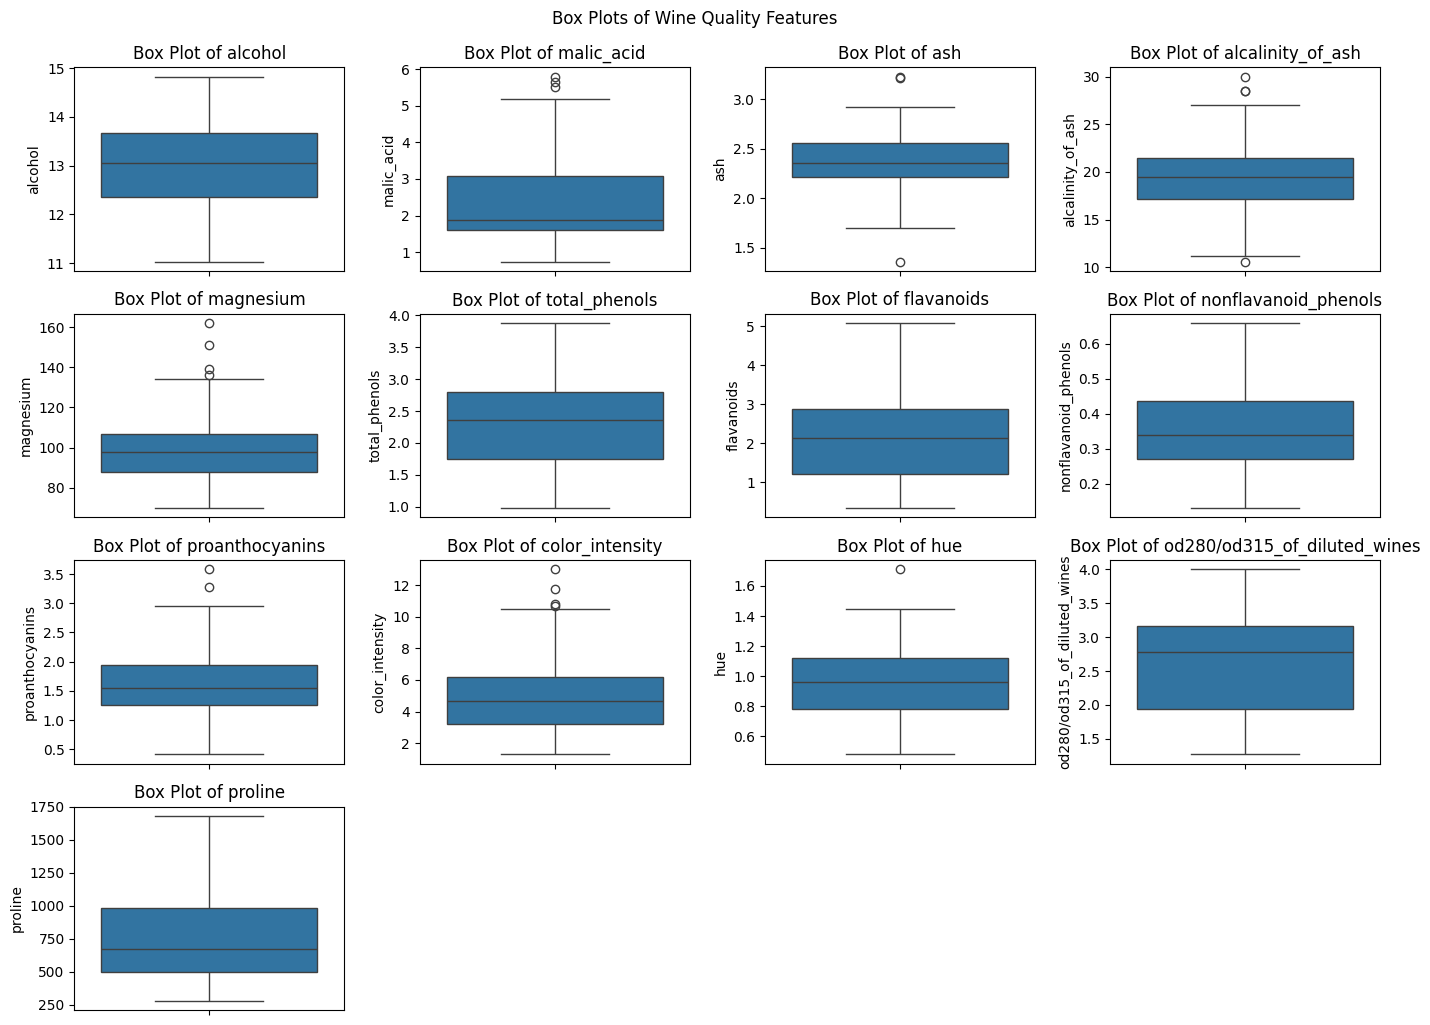

In [93]:
import seaborn as sns

# Plot box plots for each feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.suptitle('Box Plots of Wine Quality Features', y=1.02)
plt.show()

C:\Users\419007\AppData\Local\Temp\ipykernel_11692\2370222387.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\419007\AppData\Local\Temp\ipykernel_11692\2370222387.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\419007\AppData\Local\Temp\ipykernel_11692\2370222387.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\419007\AppData\Local\Temp\ipykernel_11692\2370222387.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

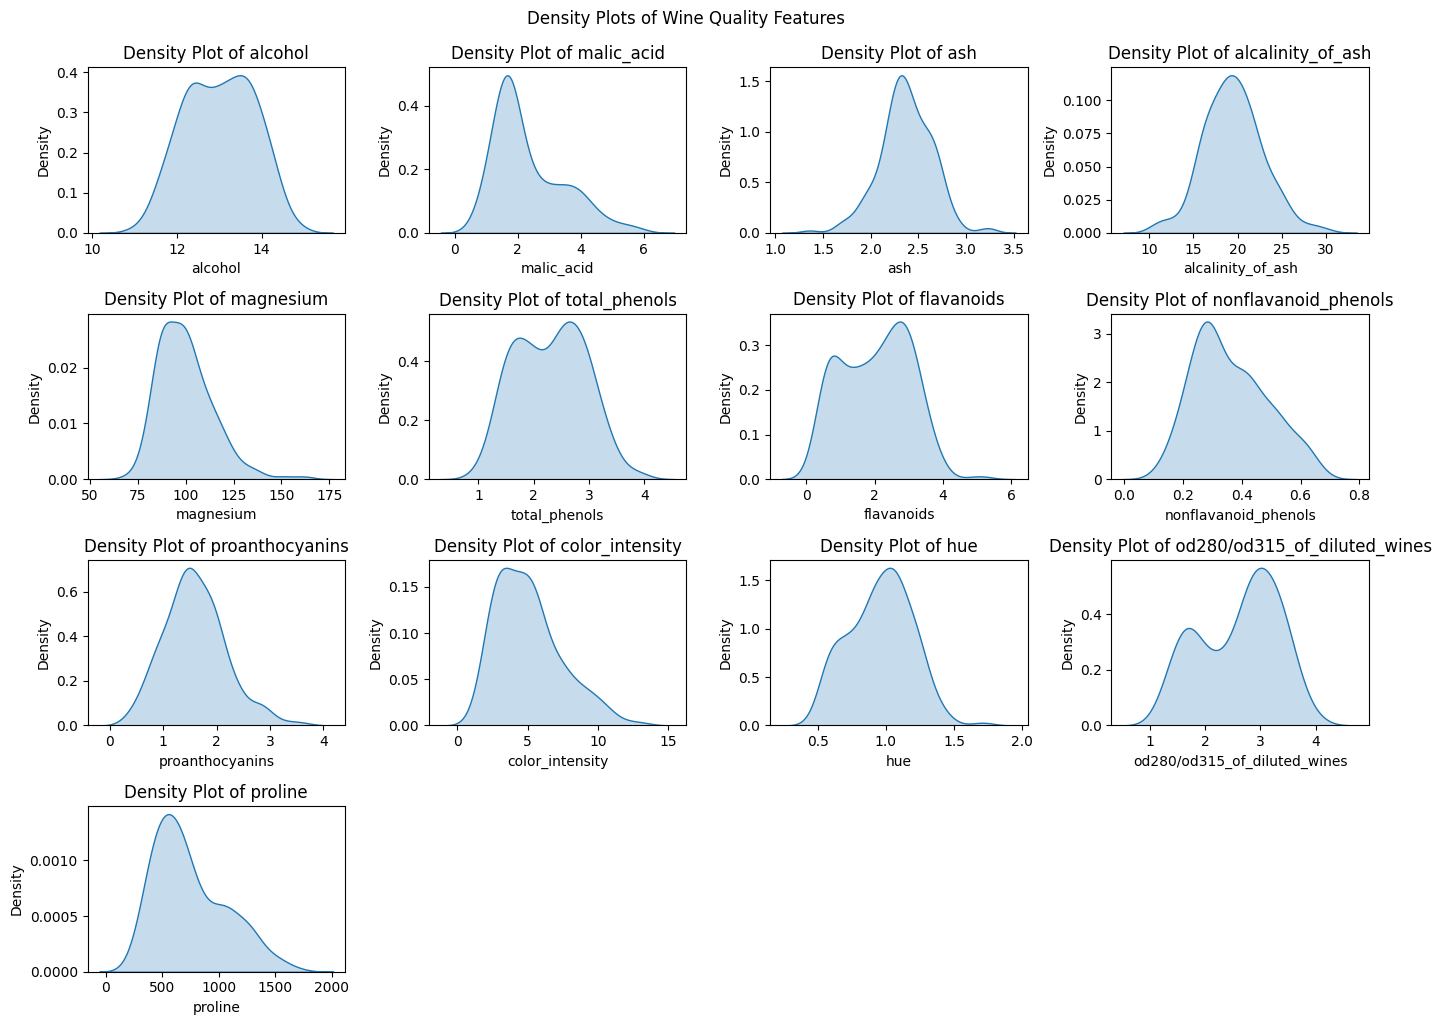

In [94]:
# Plot density plots for each feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
plt.tight_layout()
plt.suptitle('Density Plots of Wine Quality Features', y=1.02)
plt.show()

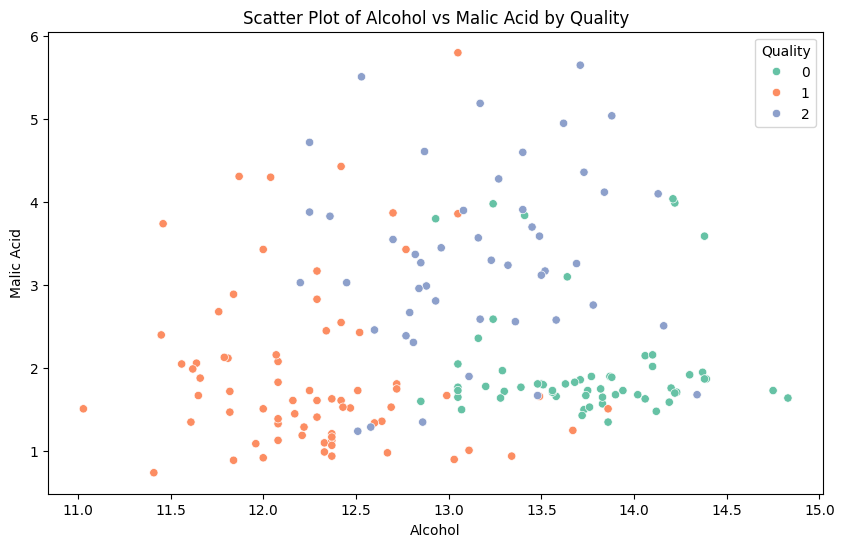

In [ ]:
#Scatter plot
# Scatter plot for two features with hue based on target column
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='Quality', palette='Set2')
plt.title('Scatter Plot of Alcohol vs Malic Acid by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

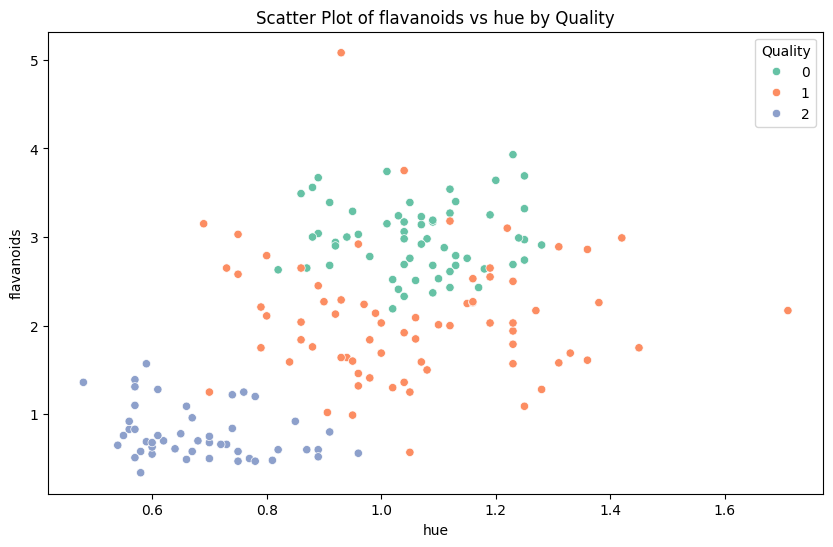

In [ ]:
#Here we can see a clustered graph of flavanoids vs hue by Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hue', y='flavanoids', hue='Quality', palette='Set2')
plt.title('Scatter Plot of flavanoids vs hue by Quality')
plt.xlabel('hue')
plt.ylabel('flavanoids')
plt.show()

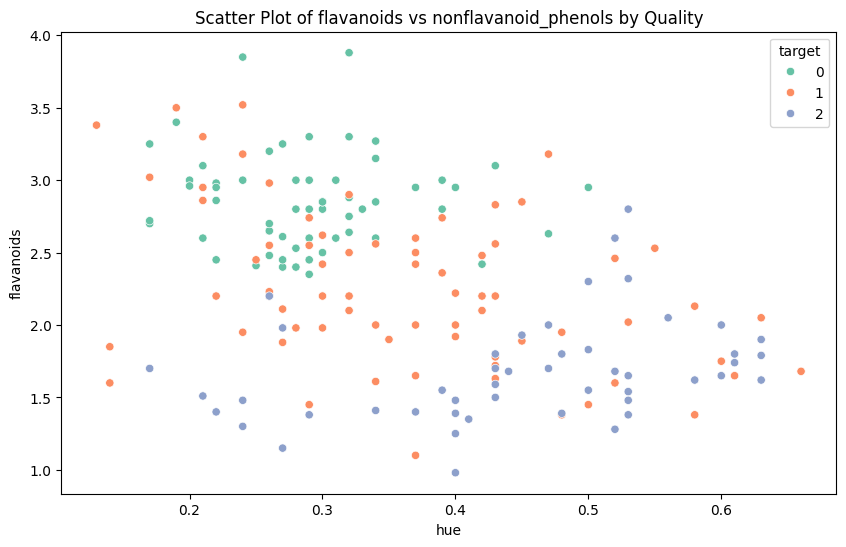

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nonflavanoid_phenols', y='total_phenols', hue='target', palette='Set2')
plt.title('Scatter Plot of flavanoids vs nonflavanoid_phenols by Quality')
plt.xlabel('hue')
plt.ylabel('flavanoids')
plt.show()

In [120]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Quality'],
      dtype='object')

C:\Users\419007\AppData\Local\Temp\ipykernel_11692\3564203354.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='od280/od315_of_diluted_wines',y='Quality', palette='Set2')


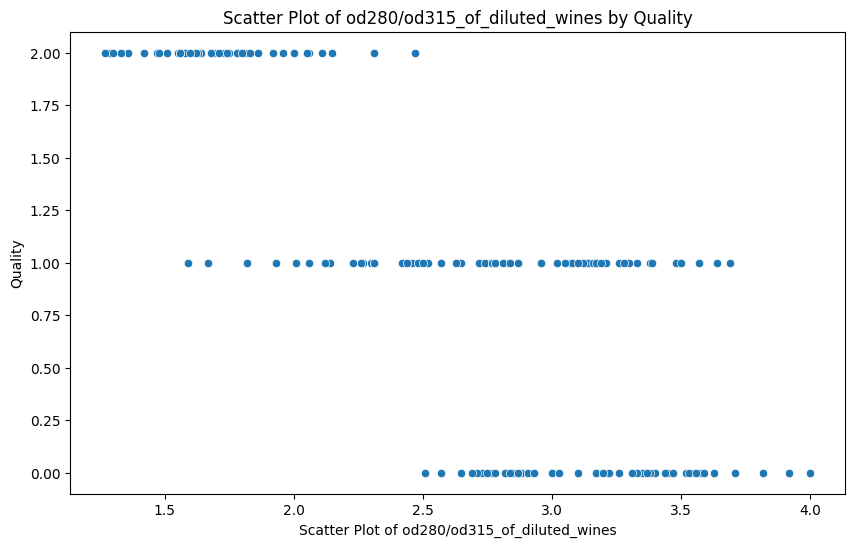

In [ ]:
#Here we can see that quality is 2 then od280/od315_of_diluted_wines is low,
# quality is 1 it will be medium,quality is 0 it will be high.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='od280/od315_of_diluted_wines',y='Quality', palette='Set2')
plt.title('Scatter Plot of od280/od315_of_diluted_wines by Quality')
plt.xlabel('Scatter Plot of od280/od315_of_diluted_wines')
plt.ylabel('Quality')
plt.show()

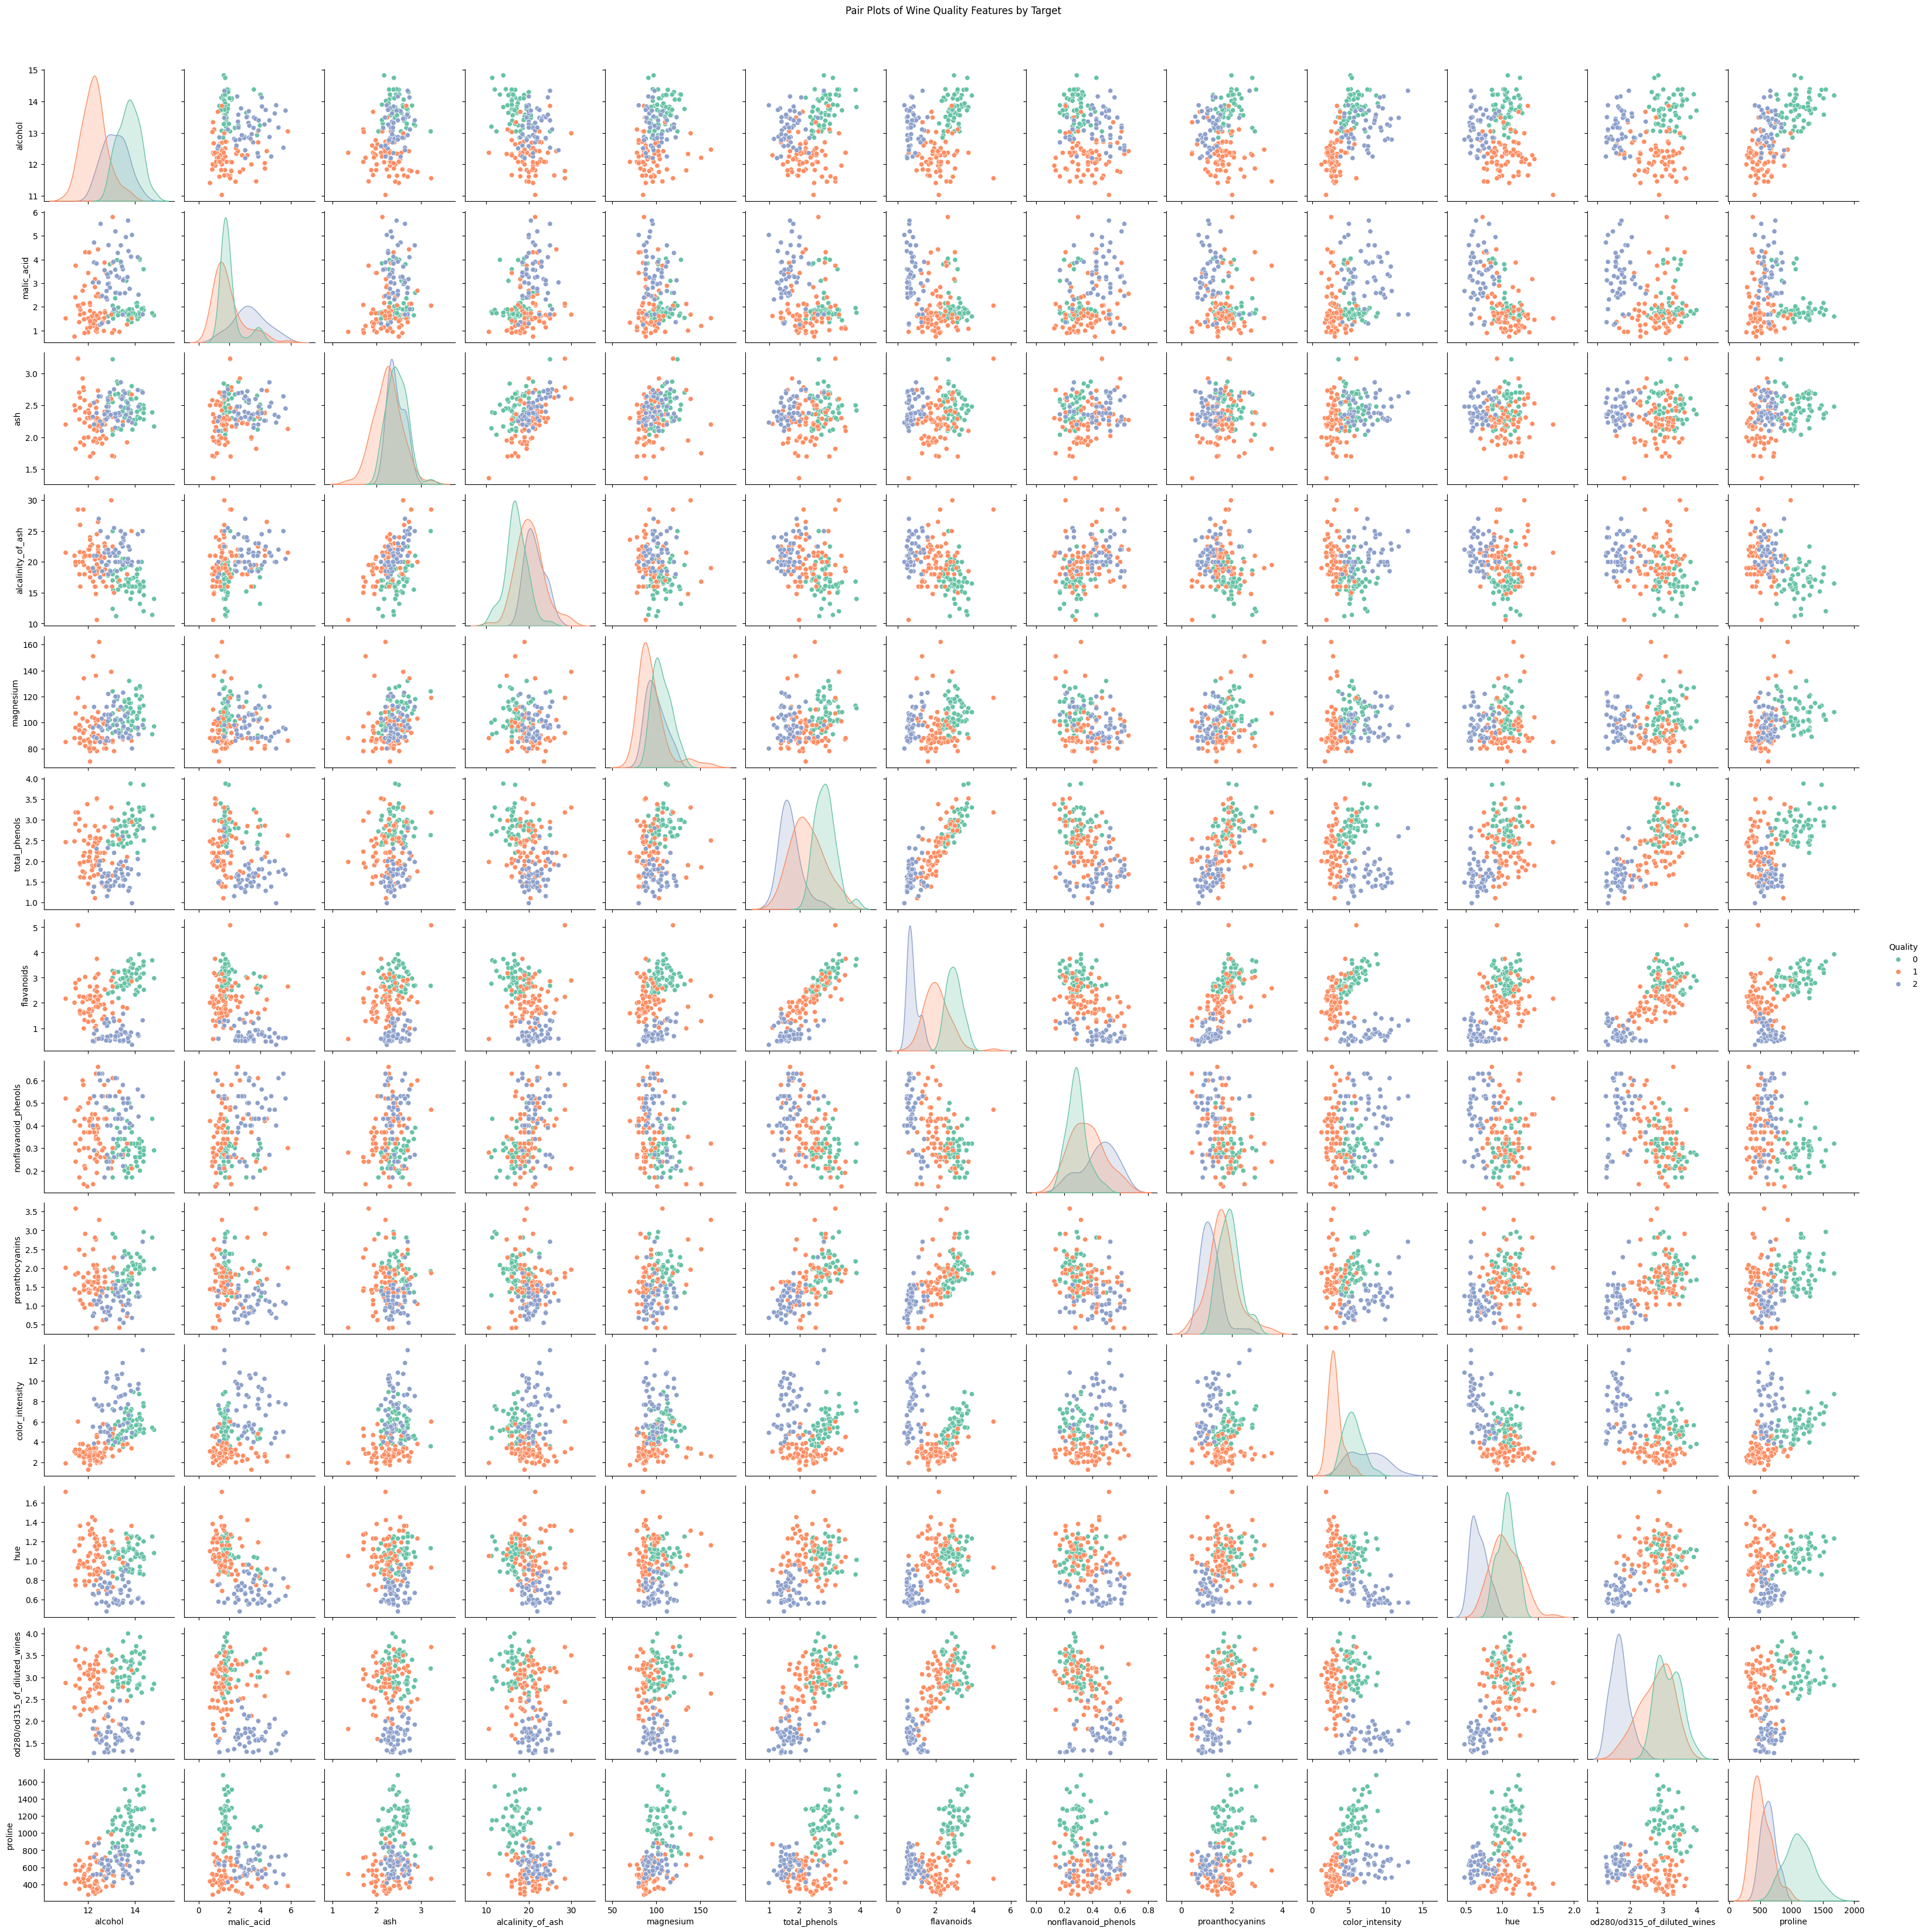

In [98]:
# Pair plot for all features with hue based on quality
sns.pairplot(df, hue='Quality', palette='Set2')
plt.suptitle('Pair Plots of Wine Quality Features by Target', y=1.02)
plt.show()

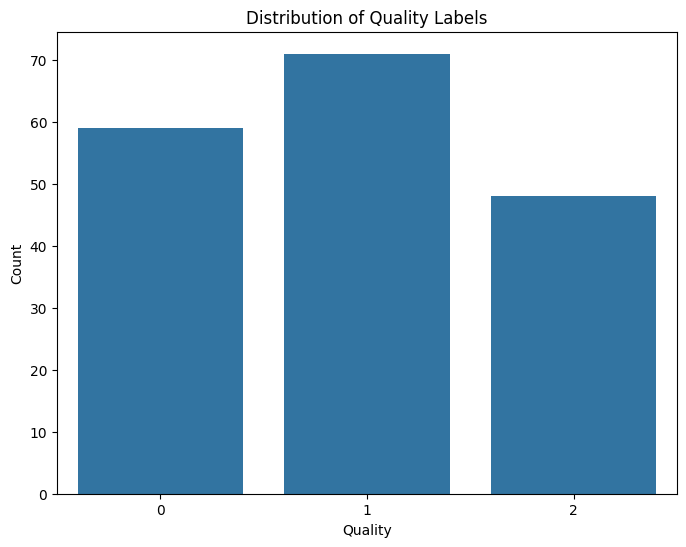

In [99]:
# Plot the distribution of quality labels using seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df)
plt.title('Distribution of Quality Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

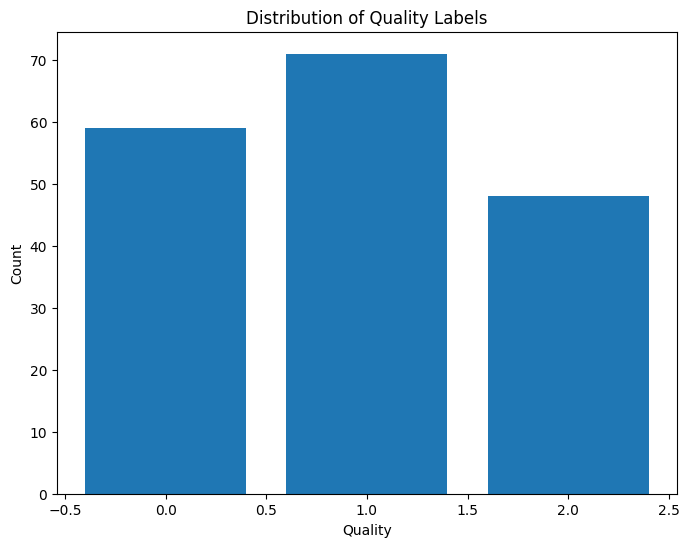

In [100]:
# Calculate the counts for each quality label
quality_counts = df['Quality'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values)
plt.title('Distribution of Quality Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Data Prepration

In [101]:
df.isnull().sum()#There is no null values,SO no need for handling missing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Quality                         0
dtype: int64

In [102]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [103]:
x = df.iloc[:, :-1]
x

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
0     13.20        1.78  2.14               11.2      100.0           2.65   
0     13.16        2.36  2.67               18.6      101.0           2.80   
0     14.37        1.95  2.50               16.8      113.0           3.85   
0     13.24        2.59  2.87               21.0      118.0           2.80   
..      ...         ...   ...                ...        ...            ...   
2     13.71        5.65  2.45               20.5       95.0           1.68   
2     13.40        3.91  2.48               23.0      102.0           1.80   
2     13.27        4.28  2.26               20.0      120.0           1.59   
2     13.17        2.59  2.37               20.0      120.0           1.65   
2     14.13        4.10  2.74               24.5       96.0           2.05   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
0         2.76                  0.26             1.28             4.38  1.05   
0         3.24                  0.30             2.81             5.68  1.03   
0         3.49                  0.24             2.18             7.80  0.86   
0         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
2         0.61                  0.52             1.06             7.70  0.64   
2         0.75                  0.43             1.41             7.30  0.70   
2         0.69                  0.43             1.35            10.20  0.59   
2         0.68                  0.53             1.46             9.30  0.60   
2         0.76                  0.56             1.35             9.20  0.61   

    od280/od315_of_diluted_wines  proline  
0                           3.92   1065.0  
0                           3.40   1050.0  
0                           3.17   1185.0  
0                           3.45   1480.0  
0                           2.93    735.0  
..                           ...      ...  
2                           1.74    740.0  
2                           1.56    750.0  
2                           1.56    835.0  
2                           1.62    840.0  
2                           1.60    560.0  

[178 rows x 13 columns]

In [104]:
y=df.iloc[:,-1]
y

0    0
0    0
0    0
0    0
0    0
    ..
2    2
2    2
2    2
2    2
2    2
Name: Quality, Length: 178, dtype: int32

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [106]:
x_resampled.value_counts()

alcohol    malic_acid  ash       alcalinity_of_ash  magnesium   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue       od280/od315_of_diluted_wines  proline   
11.030000  1.510000    2.200000  21.500000          85.000000   2.460000       2.170000    0.520000              2.010000         1.900000         1.710000  2.870000                      407.00000     1
13.400000  3.910000    2.480000  23.000000          102.000000  1.800000       0.750000    0.430000              1.410000         7.300000         0.700000  1.560000                      750.00000     1
13.405933  3.284702    2.379440  19.073693          101.442158  1.811474       0.726735    0.567929              1.460766         8.745376         0.712985  1.628563                      676.91231     1
13.410000  3.840000    2.120000  18.800000          90.000000   2.450000       2.680000    0.270000              1.480000         4.280000         0.910000  3.000000                      1035.0

In [107]:
#Now the data is resampled,All the classes contain same number of values
y_resampled.value_counts()

Quality
0    71
1    71
2    71
Name: count, dtype: int64

In [108]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Normalized features using StandardScaler:")
print(scaled_df)

Normalized features using StandardScaler:
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563    

### splitting data

In [109]:
# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Training set:")
print(X_train)
print(y_train)
print("\nValidation set:")
print(X_val)
print(y_val)
print("\nTesting set:")
print(X_test)
print(y_test)

Training set:
       alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
129  12.040000    4.300000  2.380000          22.000000   80.000000   
169  13.400000    4.600000  2.860000          25.000000  112.000000   
47   13.900000    1.680000  2.120000          16.000000  101.000000   
27   13.300000    1.720000  2.140000          17.000000   94.000000   
172  14.160000    2.510000  2.480000          20.000000   91.000000   
..         ...         ...       ...                ...         ...   
115  11.030000    1.510000  2.200000          21.500000   85.000000   
193  13.484704    3.580031  2.191636          19.535048   88.077884   
96   11.810000    2.120000  2.740000          21.500000  134.000000   
186  13.883533    1.902013  2.587809          15.007066  101.007066   
3    14.370000    1.950000  2.500000          16.800000  113.000000   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
129       2.100000    1.750000              0.420000        

### Base model building and Evaluation

In [110]:
# Initialize the models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_val)
decision_tree_accuracy = accuracy_score(y_val, y_pred_decision_tree)

# Train and evaluate K-Nearest Neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, y_pred_knn)

print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy}")

Logistic Regression Accuracy: 0.9534883720930233
Decision Tree Accuracy: 0.9534883720930233
K-Nearest Neighbors Accuracy: 0.8372093023255814


c:\Users\419007\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
log_reg_report = classification_report(y_val, y_pred_log_reg)

decision_tree_report = classification_report(y_val, y_pred_decision_tree)

knn_report = classification_report(y_val, y_pred_knn)

print("Logistic Regression Classification Report:")
print(log_reg_report)
print("\nDecision Tree Classification Report:")
print(decision_tree_report)
print("\nK-Nearest Neighbors Classification Report:")
print(knn_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      0.93      0.93        14
           2       0.92      1.00      0.96        12

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      0.93      0.93        14
           2       0.92      1.00      0.96        12

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
    

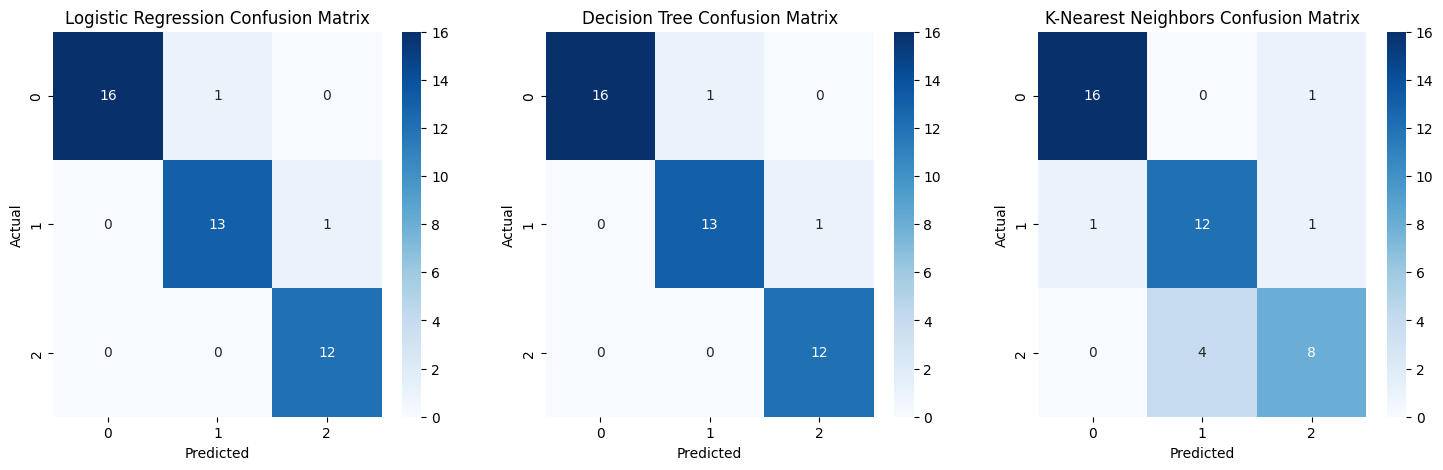

In [112]:
log_reg_cm = confusion_matrix(y_val, y_pred_log_reg)

decision_tree_cm = confusion_matrix(y_val, y_pred_decision_tree)

knn_cm = confusion_matrix(y_val, y_pred_knn)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(log_reg_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(decision_tree_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(knn_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('K-Nearest Neighbors Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

### Hyper Parameter Tuning

In [113]:
# # Logistic Regression with Grid Search
# log_reg = LogisticRegression()
# log_reg_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
# log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
# log_reg_grid.fit(X_train_val, y_train_val)

# # Decision Tree with Grid Search
# decision_tree = DecisionTreeClassifier()
# decision_tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
# decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, cv=5)
# decision_tree_grid.fit(X_train_val, y_train_val)

# # K-Nearest Neighbors with Grid Search
# knn = KNeighborsClassifier()
# knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
# knn_grid = GridSearchCV(knn, knn_params, cv=5)
# knn_grid.fit(X_train_val, y_train_val)

# print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
# print("Best parameters for Decision Tree:", decision_tree_grid.best_params_)
# print("Best parameters for K-Nearest Neighbors:", knn_grid.best_params_)
# , 'solver': ['liblinear'] , 'penalty': ['l1', 'l2']

c:\Users\419007\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\419007\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Accuracy: 0.9534883720930233
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      0.93      0.93        14
           2       0.92      1.00      0.96        12

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


K-Nearest Neighbors Accuracy: 1.0
K-Nearest Neighbors Classification Report:
  

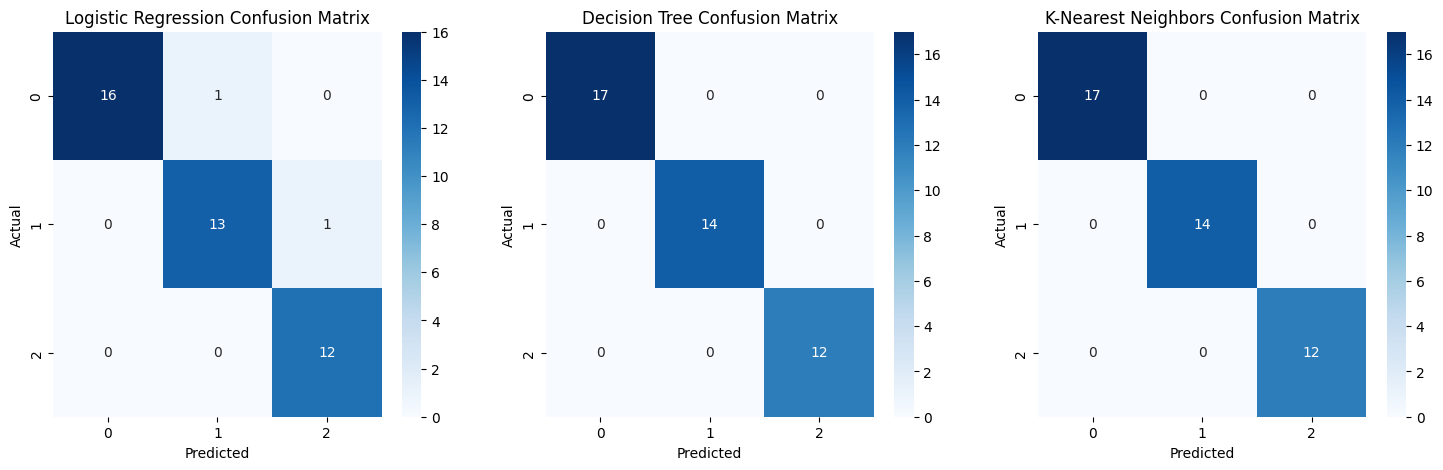

In [114]:
# Logistic Regression with Grid Search
log_reg = LogisticRegression()
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train_val, y_train_val)

# Decision Tree with Grid Search
decision_tree = DecisionTreeClassifier()
decision_tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, cv=5)
decision_tree_grid.fit(X_train_val, y_train_val)

# K-Nearest Neighbors with Grid Search
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_val, y_train_val)

# Get the best models from Grid Search
best_log_reg = log_reg_grid.best_estimator_
best_decision_tree = decision_tree_grid.best_estimator_
best_knn = knn_grid.best_estimator_

# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_val)
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_report = classification_report(y_val, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_val, y_pred_log_reg)

# Evaluate Decision Tree
y_pred_decision_tree = best_decision_tree.predict(X_val)
decision_tree_accuracy = accuracy_score(y_val, y_pred_decision_tree)
decision_tree_report = classification_report(y_val, y_pred_decision_tree)
decision_tree_cm = confusion_matrix(y_val, y_pred_decision_tree)

# Evaluate K-Nearest Neighbors
y_pred_knn = best_knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, y_pred_knn)
knn_report = classification_report(y_val, y_pred_knn)
knn_cm = confusion_matrix(y_val, y_pred_knn)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:")
print(log_reg_report)
print("\nDecision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:")
print(decision_tree_report)
print("\nK-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(log_reg_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(decision_tree_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(knn_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('K-Nearest Neighbors Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

In [115]:
# Feature importance for Decision Tree
feature_importances = best_decision_tree.feature_importances_
features = x.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Feature Importances for Decision Tree:")
print(feature_importance_df)

Feature Importances for Decision Tree:
                         Feature  Importance
6                     flavanoids    0.427347
12                       proline    0.416687
11  od280/od315_of_diluted_wines    0.063457
1                     malic_acid    0.048171
9                color_intensity    0.033867
0                        alcohol    0.010471
2                            ash    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


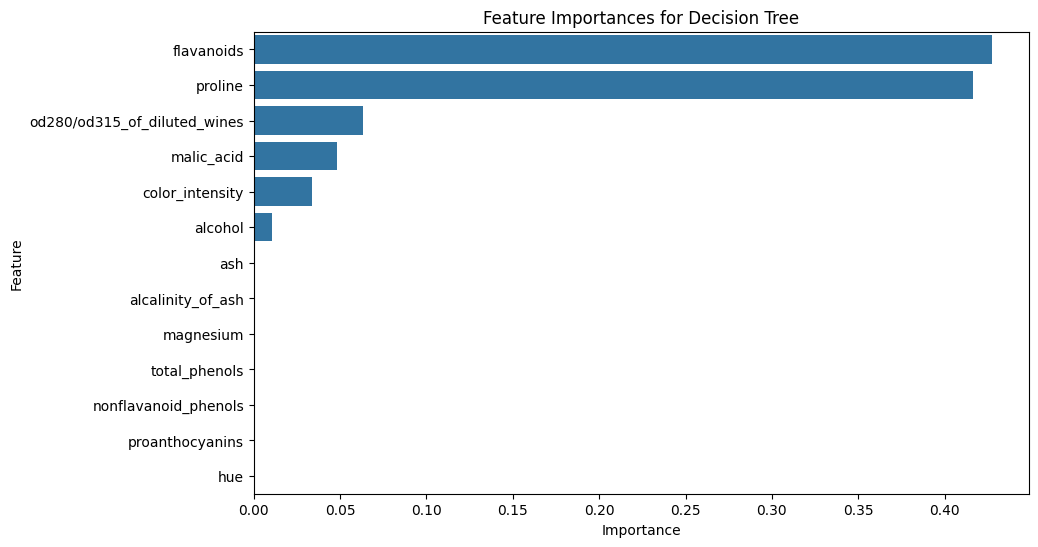

In [116]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances for Decision Tree')
plt.show()


Feature Importances for Logistic Regression:
                         Feature  Importance
6                     flavanoids    0.420489
11  od280/od315_of_diluted_wines    0.323688
1                     malic_acid    0.278862
5                  total_phenols    0.187547
9                color_intensity    0.131832
2                            ash    0.118432
0                        alcohol    0.109119
8                proanthocyanins    0.059804
12                       proline    0.009057
10                           hue    0.001730
7           nonflavanoid_phenols   -0.022965
4                      magnesium   -0.044064
3              alcalinity_of_ash   -0.351399


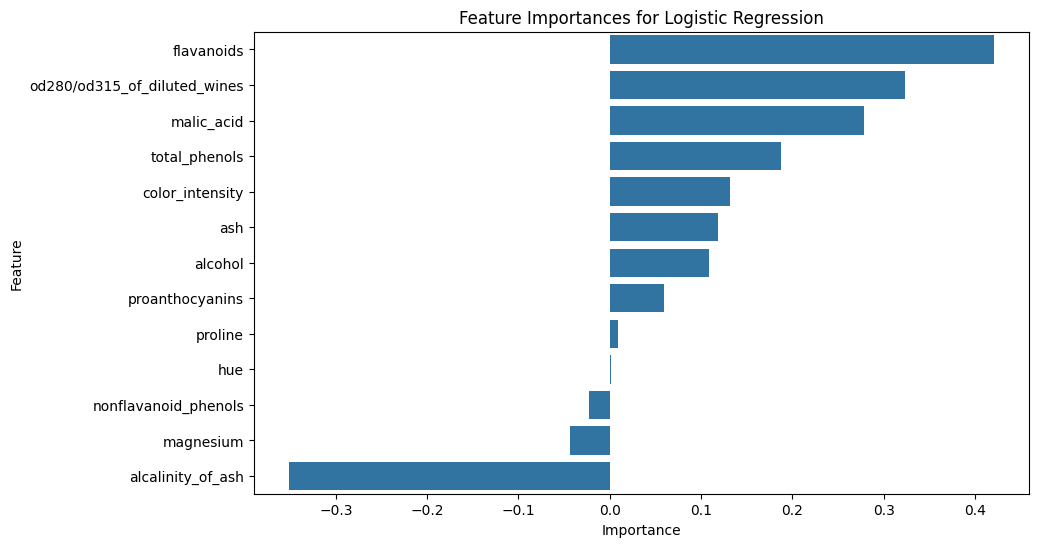

In [117]:
# Feature importance for Logistic Regression (coefficients)
log_reg_coefficients = best_log_reg.coef_[0]
features = x.columns

# Create a DataFrame for feature importances (coefficients) for Logistic Regression
log_reg_importance_df = pd.DataFrame({'Feature': features, 'Importance': log_reg_coefficients})
log_reg_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nFeature Importances for Logistic Regression:")
print(log_reg_importance_df)

# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=log_reg_importance_df)
plt.title('Feature Importances for Logistic Regression')
plt.show()


Feature Importances for K-Nearest Neighbors:
                         Feature  Importance
12                       proline    0.623256
4                      magnesium    0.151163
9                color_intensity    0.051163
3              alcalinity_of_ash    0.013953
1                     malic_acid    0.011628
6                     flavanoids    0.006977
0                        alcohol    0.000000
2                            ash    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000


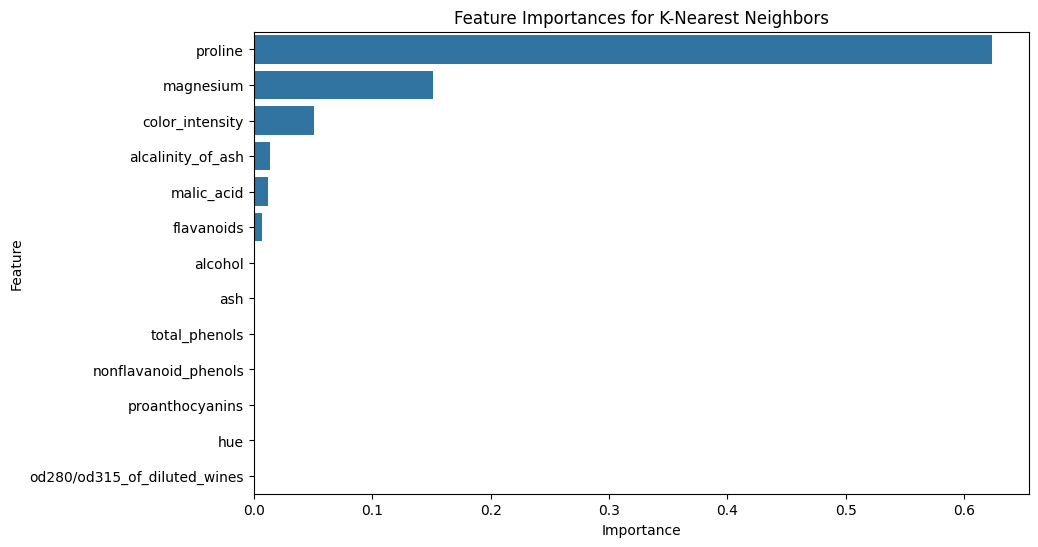

In [118]:
# Permutation importance for K-Nearest Neighbors
result = permutation_importance(best_knn, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
knn_importance_df = pd.DataFrame({'Feature': features, 'Importance': result.importances_mean})
knn_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nFeature Importances for K-Nearest Neighbors:")
print(knn_importance_df)

# Plot feature importances for K-Nearest Neighbors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_importance_df)
plt.title('Feature Importances for K-Nearest Neighbors')
plt.show()

### Insights and future enhancements

In [119]:
#  Winemakers can focus on optimizing the levels of proline, magnesium, and color intensity to improve wine quality as per the feature importance of decision tree.
# Before hyperparameter tuning accuracy of three models are 0.9534883720930233,0.9069767441860465,0.8372093023255814
# After it increased to 0.9534883720930233,1.0,1.0.
